In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

import h5py
from scipy.stats import kde

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from numpy import cov

from matplotlib.collections import LineCollection

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Read in results

In [3]:
samples_100 = np.loadtxt("output/samples_Feng2019_new_inp4_70000_LWModel_UniPriorW_6em7_PV0p4_4423_c.txt",skiprows=1)
models_100 = -np.loadtxt("output/models_Feng2019_new_inp4_70000_LWModel_UniPriorW_6em7_PV0p4_4423_c.txt",skiprows=1)
obs = np.loadtxt("Feng2019_delay.txt")

samph5 = h5py.File("output/samples_Feng2019_new_inp4_70000_LWModel_UniPriorW_6em7_PV0p4_4423_c.h5")
modh5 = h5py.File("output/models_Feng2019_new_inp4_70000_LWModel_UniPriorW_6em7_PV0p4_4423_c.h5")


samp_LT = samph5["LogTarget"][()]
samp_S = samph5["samples"][()]
samp_Is = samph5["iteration"][()]
mod_S = modh5["samples"][()]

print(samph5.keys())

samph5.close()
modh5.close()

samples_lya = np.loadtxt("output/samples_Feng2019_lyac_inp4_70000_LWModel_UniPriorW_1em6_PV0p4_3442_c.txt",skiprows=1)
models_lya = -np.loadtxt("output/models_Feng2019_lyac_inp4_70000_LWModel_UniPriorW_1em6_PV0p4_3442_c.txt",skiprows=1)
obs_lya = np.loadtxt("Feng2019_nodelay.txt")

samples_lya = samples_lya[:,[1,2,3,0]]

samph5 = h5py.File("output/samples_Feng2019_lyac_inp4_70000_LWModel_UniPriorW_1em6_PV0p4_3442_c.h5")
modh5 = h5py.File("output/models_Feng2019_lyac_inp4_70000_LWModel_UniPriorW_1em6_PV0p4_3442_c.h5")


samp_LT_lya = samph5["LogTarget"][()]
samp_S_lya = samph5["samples"][()]
samp_Is_lya = samph5["iteration"][()]
mod_S_lya = modh5["samples"][()]

print(modh5.keys())

samph5.close()
modh5.close()

ind_best_lya = np.argmax(samp_LT_lya[0][:])
ind_best = np.argmax(samp_LT[0][:])

print(samples_lya[ind_best_lya,:])
print(samples_100[ind_best,:])

<KeysViewHDF5 ['IsProposal', 'LogTarget', 'QOI', 'iteration', 'samples', 'time', 'weights']>
<KeysViewHDF5 ['samples', 'weights']>
[3.01818  0.806723 0.33568  2.05086 ]
[1.40299  1.63568  0.849997 0.479908]


## Figure 6

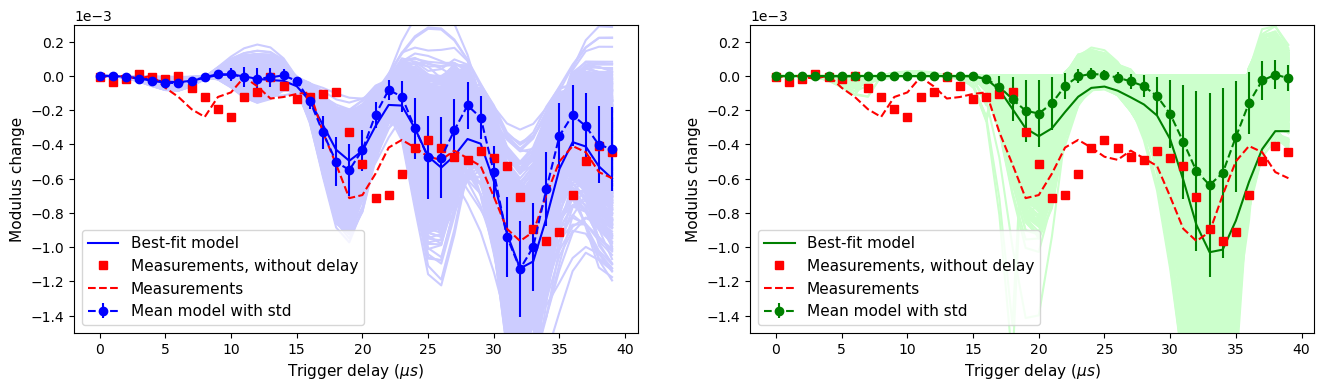

In [4]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))
axes[0].plot(models_100[0:-1:100,:].T,"-",color=[0.8,0.8,1.0])

axes[0].plot(np.linspace(0,39,40),models_100[ind_best-1,:],linestyle='-',color='b',label='Best-fit model')
axes[0].errorbar(np.linspace(0,39,40),np.mean(models_100[:,:],axis=0),linestyle='--',marker='o',color='b'\
                   ,yerr=np.std(models_100[:,:],axis=0),label='Mean model with std')

axes[0].plot(obs,"rs",label='Measurements, without delay')
axes[0].plot(obs_lya,"r--",label='Measurements')

axes[0].set_ylim([-15e-4,3e-4])
axes[0].set_xlabel('Trigger delay ($\\mu s$)',fontsize=11)
axes[0].set_ylabel('Modulus change',fontsize=11)
axes[0].legend(fontsize=11)
axes[0].ticklabel_format(axis='y',style='sci',scilimits=(-0, 0))

axes[1].plot(models_lya[0:-1:20,:].T,"-",color=[0.8,1.0,0.8])

axes[1].plot(np.linspace(0,39,40),models_lya[ind_best_lya-1,:],linestyle='-',color='g',label='Best-fit model')
axes[1].errorbar(np.linspace(0,39,40),np.mean(models_lya[:,:],axis=0),linestyle='--',marker='o',color='g'\
                   ,yerr=np.std(models_lya[:,:],axis=0),label='Mean model with std')

axes[1].plot(obs,"rs",label='Measurements, without delay')
axes[1].plot(obs_lya,"r--",label='Measurements')

axes[1].set_ylim([-15e-4,3e-4])
axes[1].set_xlabel('Trigger delay ($\\mu s$)',fontsize=11)
axes[1].set_ylabel('Modulus change',fontsize=11)
axes[1].legend(fontsize=11)
axes[1].ticklabel_format(axis='y',style='sci',scilimits=(-0, 0))

#plt.savefig("InvModels6M.pdf",bbox_inches='tight')

## Figure 7

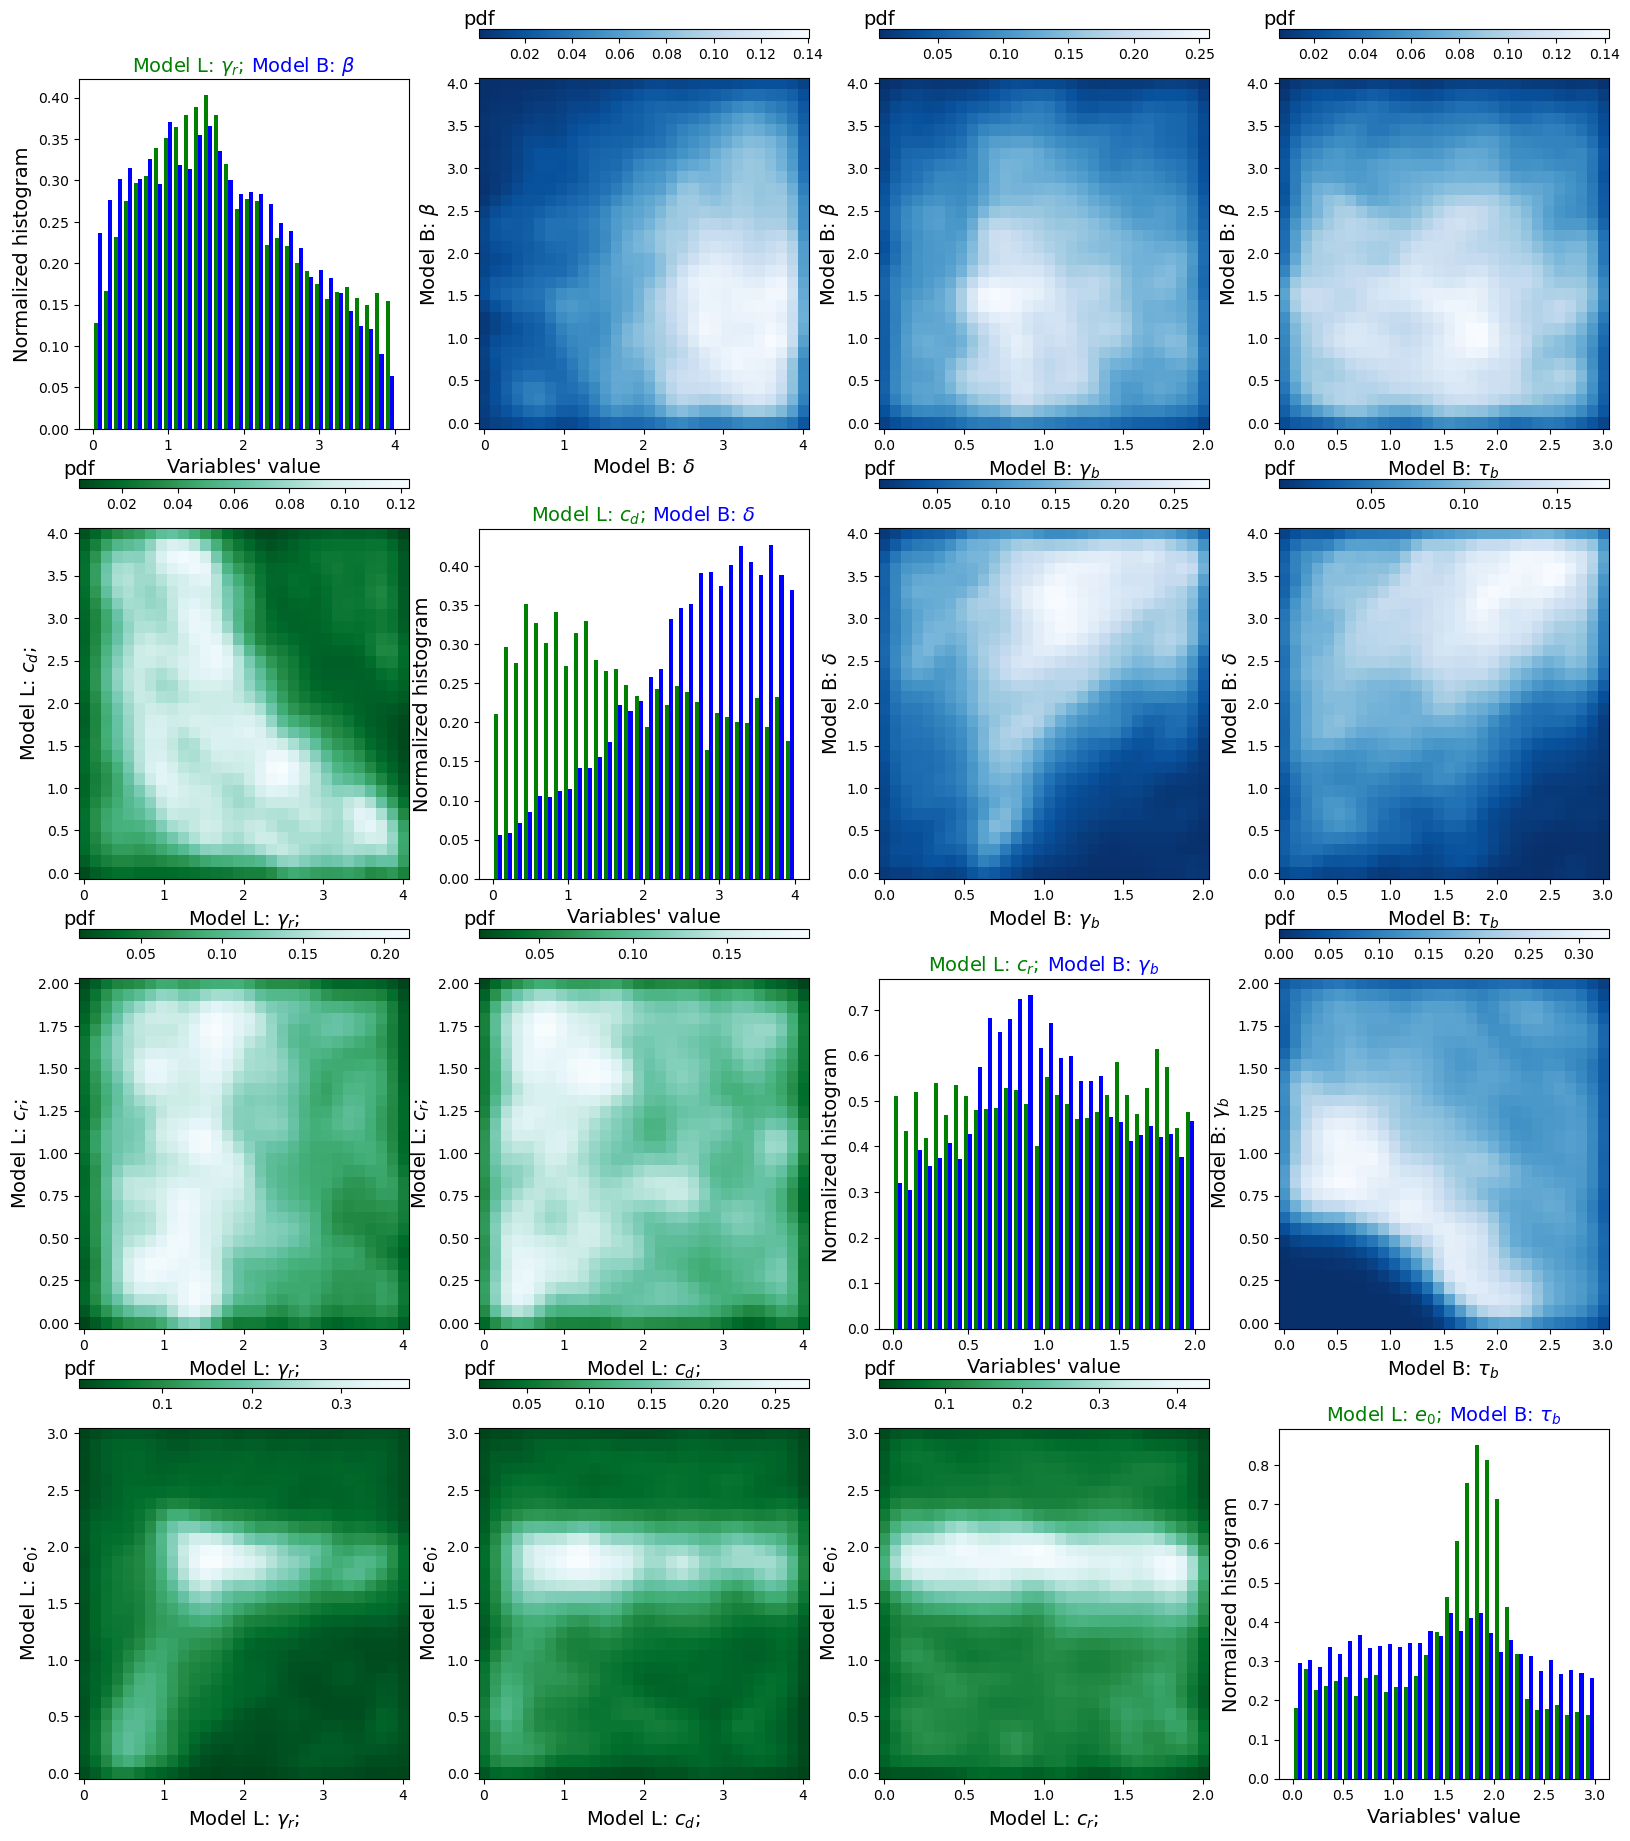

In [7]:
varL_list = list(['Model L: $\\gamma_r$;','Model L: $c_d$;','Model L: $c_r$;','Model L: $e_0$;'])
varB_list = list(['Model B: $\\beta$','Model B: $\\delta$','Model B: $\\gamma_b$','Model B: $\\tau_b$'])

fig = plt.figure(figsize=(16, 18)) # 7 inches wide, 5 inches tall
row = int(fig.get_figheight() * 10)
col = int(fig.get_figwidth() * 10)
gsfig = gridspec.GridSpec(
    row, col, 
    left=0, right=1, bottom=0,
    top=1, wspace=0, hspace=0)

margin_d = 3;
gs11 = gsfig[7:42, 4:37];gs12 = gsfig[2:42, 40+4:40+37];gs13 = gsfig[2:42, 80+4:80+37];gs14 = gsfig[2:42, 120+4:120+37];
gs21 = gsfig[45+2:45+42, 4:37];gs22 = gsfig[45+7:45+42, 44:77];gs23 = gsfig[45+2:45+42, 84:117];gs24 = gsfig[45+2:45+42, 124:157];
gs31 = gsfig[90+2:90+42, 4:37];gs32 = gsfig[90+2:90+42, 44:77];gs33 = gsfig[90+7:90+42, 84:117];gs34 = gsfig[90+2:90+42, 124:157];
gs41 = gsfig[135+2:135+42, 4:37];gs42 = gsfig[135+2:135+42, 44:77];gs43 = gsfig[135+2:135+42, 84:117];gs44 = gsfig[135+7:135+42, 124:157];
axss = list([[gs11,gs12,gs13,gs14],\
             [gs21,gs22,gs23,gs24],\
             [gs31,gs32,gs33,gs34],\
             [gs41,gs42,gs43,gs44]])

n_contour = 1;
nbins = 30

hist_colors = ['g','b']
hist_labels = ['Model L','Model B']
for i_x in range(4):
    axij = fig.add_subplot(axss[i_x][i_x])
    
    xbox1 = TextArea(varL_list[i_x],textprops=dict(color='g',size=14))
    xbox2 = TextArea(varB_list[i_x],textprops=dict(color='b',size=14))
    xbox = HPacker(children=[xbox1,xbox2],align='center',pad=0,sep=5)

    anchored_xbox1 = AnchoredOffsetbox(loc='upper center', child=xbox, pad=0., frameon = False,
                                      bbox_to_anchor=(0.5, 1.07),
                                      bbox_transform=axij.transAxes, borderpad=0.)
    axij.add_artist(anchored_xbox1)
    
    axij.hist([samples_lya[0:,i_x],samples_100[0:,i_x]],bins = nbins, density = True,\
                       color = hist_colors, label = hist_labels)
    axij.set_ylabel('Normalized histogram', fontsize=14)
    axij.set_xlabel('Variables\' value', fontsize=14)

for i in range(4):
    for j in range(4):
        if i-j < 0:
            axij = fig.add_subplot(axss[i][j])
            data = samples_100[:,[j,i]]

            # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
            k = kde.gaussian_kde(data.T)
            x, y = data.T
            xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
            zi = k(np.vstack([xi.flatten(), yi.flatten()]))
            # plot a density
            im = axij.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.Blues_r)
            axij.set_ylabel(varB_list[i], fontsize=14)
            axij.set_xlabel(varB_list[j], fontsize=14)
            
            divider = make_axes_locatable(axij)
            cax1 = divider.append_axes("top", size="2.5%", pad=0.4)
            cbar = plt.colorbar(im,cax=cax1, ax=axij,orientation='horizontal')
            cbar.ax.set_title('pdf',position=(0.0,-0.0),pad=1.5, fontsize=14)
            
            axij = fig.add_subplot(axss[j][i])
            data = samples_lya[:,[j,i]]
            
            # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
            k = kde.gaussian_kde(data.T)
            x, y = data.T
            xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
            zi = k(np.vstack([xi.flatten(), yi.flatten()]))
            # plot a density
            im = axij.pcolormesh(yi, xi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.BuGn_r)
            axij.set_xlabel(varL_list[i], fontsize=14)
            axij.set_ylabel(varL_list[j], fontsize=14)
            
            divider = make_axes_locatable(axij)
            cax1 = divider.append_axes("top", size="2.5%", pad=0.40)
            cbar = plt.colorbar(im,cax=cax1, ax=axij,orientation='horizontal')
            cbar.ax.set_title('pdf',position=(0.0,-0.0),pad=1.5, fontsize=14)

#plt.savefig("InvResults7.pdf",bbox_inches='tight')

## Statistical Analysis
### Correlation coefficients

In [16]:
corr, _ = spearmanr(models_100[ind_best-1,:],obs_lya)
print('spearmanr correlation: %.3f' % corr)

corr, _ = spearmanr(models_lya[ind_best_lya-1,:],obs_lya)
print('spearmanr correlation: %.3f' % corr)

spearmanr correlation: 0.910
spearmanr correlation: 0.834


### Monte Carlo standard errors (MCSE)

In [18]:
import arviz as az

In [19]:
az.ess(samples_100[:,0]),np.std(samples_100[:,0]),az.mcse(samples_100[:,0],method='mean'),np.std(samples_100[:,0])/np.sqrt(az.ess(samples_100[:,0]))

(3035.081603496557,
 1.0142284508407535,
 array([0.01880689]),
 0.018409864961535925)

In [24]:
mcse_b = np.zeros((4,1))
ess_b = np.zeros((4,))
for i in range(4):
    ess_b[i] = az.ess(samples_100[:,i])
    mcse_b[i,0] = az.mcse(samples_100[:,i],method='mean')
    #mcse_b[i,1] = np.std(samples_100[:,i])/np.sqrt(ess_b[i])
    
mcse_l = np.zeros((4,1))
ess_l = np.zeros((4,))
for i in range(4):
    ess_l[i] = az.ess(samples_lya[:,i])
    mcse_l[i,0] = az.mcse(samples_lya[:,i],method='mean')
    #mcse_l[i,1] = np.std(samples_lya[:,i])/np.sqrt(ess_l[i])
print('Model B:')
print(mcse_b)

print('Model L:')
print(mcse_l)

Model B:
[[0.01880689]
 [0.01810353]
 [0.00883546]
 [0.01437262]]
Model L:
[[0.02471326]
 [0.02737571]
 [0.01251156]
 [0.01649157]]


### Accepted number of samples

In [73]:
plt.figure
np.unique(samp_Is).shape,np.unique(samp_Is_lya).shape

((13826,), (10444,))